In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/MLProjects/Digit Recognizer'

/content/drive/MyDrive/MLProjects/Digit Recognizer


In [3]:
import os

In [4]:
os.getcwd()

'/content/drive/MyDrive/MLProjects/Digit Recognizer'

In [5]:
import numpy as np
import pandas as pd

In [6]:
os.listdir(os.path.join(os.getcwd(),'digit-recognizer'))

['sample_submission.csv', 'test.csv', 'train.csv', 'result.csv']

In [7]:
train=pd.read_csv('/content/drive/My Drive/MLProjects/Digit Recognizer/digit-recognizer/train.csv')

In [8]:
test=pd.read_csv('/content/drive/My Drive/MLProjects/Digit Recognizer/digit-recognizer/test.csv')

In [9]:
train.shape

(42000, 785)

In [10]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
Xtrain=train.iloc[:,1:]

In [12]:
Xtrain.shape

(42000, 784)

In [13]:
ytrain=train.iloc[:,0]

In [14]:
ytrain.shape

(42000,)

In [15]:
ytrain.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [16]:
test.shape

(28000, 784)

In [17]:
Xtrain=Xtrain.astype('float32')

In [18]:
Xtrain/=255.

In [19]:
X_train=Xtrain.to_numpy()

In [20]:
X_train.shape

(42000, 784)

In [21]:
trainx=np.reshape(X_train,(X_train.shape[0],28,28,1))

In [22]:
trainx.shape

(42000, 28, 28, 1)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
Xtrain=trainx
#Xtrain,Xvalid,ytrain,yvalid=train_test_split(trainx,ytrain,test_size=.1,shuffle=True,random_state=42)

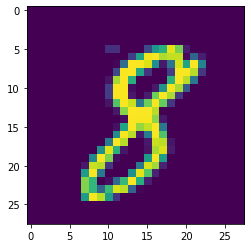

In [25]:
import matplotlib.pyplot as plt
plt.imshow(trainx[20].squeeze())

In [26]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D


In [27]:
model=Sequential()
model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
image=ImageDataGenerator(rotation_range=45,

                         shear_range=.2
                         
                         
                      )

In [31]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
#hist=model.fit(trainx,ytrain,batch_size=32,epochs=20,shuffle=True,validation_split=.1)
imageflow=image.flow(Xtrain,ytrain,batch_size=32,shuffle=True,seed=42)

In [33]:
hist=model.fit(imageflow,epochs=250)

Epoch 1/250
1313/1313 [==============================] - 32s 24ms/step - loss: 0.3694 - accuracy: 0.8823
Epoch 2/250
1313/1313 [==============================] - 32s 24ms/step - loss: 0.1364 - accuracy: 0.9570
Epoch 3/250
1313/1313 [==============================] - 31s 24ms/step - loss: 0.1041 - accuracy: 0.9685
Epoch 4/250
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0873 - accuracy: 0.9729
Epoch 5/250
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0756 - accuracy: 0.9765
Epoch 6/250
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0694 - accuracy: 0.9785
Epoch 7/250
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0631 - accuracy: 0.9807
Epoch 8/250
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0611 - accuracy: 0.9808
Epoch 9/250
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0551 - accuracy: 0.9818
Epoch 10/250
1313/1313 [==============================]

In [34]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [35]:
import matplotlib.pyplot as plt

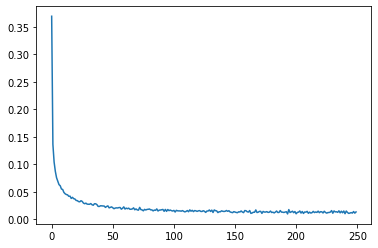

In [36]:
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])

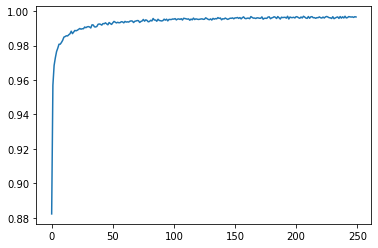

In [37]:
plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])

In [38]:
#model.evaluate(Xvalid,yvalid)

In [39]:
model.save('/content/drive/MyDrive/MLProjects/Digit Recognizer/digitecog2.h5')

In [40]:
test=test.astype('float32')

In [41]:
test/=255.

In [42]:
Xtest=test.to_numpy()

In [43]:
X_test=np.reshape(Xtest,(Xtest.shape[0],28,28,1))

In [44]:
ypred=model.predict(X_test)

In [45]:
ypred

array([[1.2424484e-13, 5.1528463e-30, 1.0000000e+00, ..., 1.9296000e-18,
        8.8768881e-33, 1.8286475e-30],
       [1.0000000e+00, 0.0000000e+00, 4.4127993e-36, ..., 1.2004192e-37,
        0.0000000e+00, 9.2040013e-31],
       [1.4535014e-12, 6.6292215e-22, 1.3473411e-09, ..., 1.2793406e-09,
        1.7077603e-08, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.7578634e-15, 2.7069638e-17, 9.8398915e-13, ..., 1.3964170e-08,
        7.5862282e-08, 9.9994469e-01],
       [8.9564708e-28, 8.6229176e-36, 1.0000000e+00, ..., 3.9775291e-23,
        2.9388495e-30, 1.0266810e-33]], dtype=float32)

In [46]:
y_pred=np.argmax(ypred,axis=1)

In [47]:
y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [48]:
result=pd.DataFrame(y_pred,columns=['Label'])

In [49]:
result.head()

,Label
0,2
1,0
2,9
3,0
4,3


In [50]:
sample=pd.read_csv('/content/drive/MyDrive/MLProjects/Digit Recognizer/digit-recognizer/sample_submission.csv')

In [51]:
sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [52]:
data=pd.concat([sample['ImageId'],result],axis=1)

In [53]:
data.set_index('ImageId',drop=True,inplace=True)

In [54]:
data.head()

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3


In [55]:
data.to_csv('/content/drive/MyDrive/MLProjects/Digit Recognizer/digit-recognizer/result_1.csv')